In [184]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import matplotlib.ticker as ticker
from bin_llcl import *

h=6.627e-34
k=1.38e-23
Tcmb=2.7
c=3e8
I=2*(k*Tcmb)**3/(h*c)**2
y=1e-4
x = h*143e9/(k*Tcmb)
cv = ((x ** 2 * np.exp(x)) / (np.exp(x) - 1) ** 2) ** (-1)
print(cv)
x2 = h*359e9/(k*Tcmb)
cv2 = ((x2 ** 2 * np.exp(x2)) / (np.exp(x2) - 1) ** 2) ** (-1)
print(cv2)

fsky = 0.43

FWHM_litebird_143 = np.deg2rad(23.25)/60
w_litebird_143 = np.deg2rad(2.37/60)**-2
theta_litebird_143 = FWHM_litebird_143/(8*np.log(2))**0.5

FWHM_planck_143 = np.deg2rad(7.3)/60
w_planck_143 = (np.deg2rad(0.55)*cv)**-2
theta_planck_143 = FWHM_planck_143/(8*np.log(2))**0.5

FWHM_litebird_403 = np.deg2rad(17.9)/60
w_litebird_403 = (np.deg2rad(23.45/60))**-2
theta_litebird_403 = FWHM_litebird_403/(8*np.log(2))**0.5

FWHM_planck_359 = np.deg2rad(4.94)/60
w_planck_359 = (np.deg2rad(2.56)*cv2)**-2
theta_planck_359 = FWHM_planck_359/(8*np.log(2))**0.5

f_143 = (h*143e9/(k*Tcmb)*(np.exp((h*143e9/(k*Tcmb)))+1)/(np.exp((h*143e9/(k*Tcmb)))-1))-4
f_402 = (h*402e9/(k*Tcmb)*(np.exp((h*402e9/(k*Tcmb)))+1)/(np.exp((h*402e9/(k*Tcmb)))-1))-4

sigma_stat=np.array([0.00615, 0.00579, 0.00805, 0.00522, 0.00464, 0.00468, 0.00429, 0.00454, 0.00562, 0.00594, 0.00611, 0.00687, 0.00824, 0.00958])
print(type(sigma_stat))
sigma_stat_planck_143 = sigma_stat*f_143**2*Tcmb**2
print(sigma_stat_planck_143)
sigma_stat_planck_402 = sigma_stat*f_402**2*Tcmb**2
print(sigma_stat_planck_402)

1.6697385603203645
14.494925612042053
<class 'numpy.ndarray'>
[0.04689176 0.04414687 0.06137864 0.03980081 0.0353785  0.03568348
 0.03270986 0.03461603 0.04285068 0.04529058 0.04658677 0.05238152
 0.06282733 0.0730444 ]
[0.44801153 0.42178647 0.5864216  0.38026345 0.33801195 0.34092585
 0.31251536 0.33072721 0.40940241 0.43271358 0.44509764 0.50046166
 0.60026261 0.69787813]


In [185]:
Cls = fits.getdata('ClsSZ_ell_cls.fits')
ll= Cls[0]
DD= Cls[1]
plt.figure(1)
plt.plot(ll,DD, label='$D_l^{SZE}$ @ 143 GHz')
plt.legend(loc="upper left")
plt.grid('on')
plt.xlabel('$l$')
plt.ylabel('$D_l^{SZE}$ $(\mu K^2)$')
plt.xscale("log")

l=ll[1:401]
D = DD[1:401]
plt.figure(2)
plt.plot(l,D, color='orange')
plt.xlim(0,400)
plt.grid('on')
plt.title('Power spectrum limited at $l=400$')
plt.xlabel('$l$')
plt.ylabel('$D_l$')

Text(0, 0.5, '$D_l$')

## Spectral distortion of the CMB radiation due to the SZE

In [186]:
def x(f):
    return (h*f/(k*Tcmb)*(np.exp((h*f/(k*Tcmb)))+1)/(np.exp((h*f/(k*Tcmb)))-1))-4
def a(f) :
    return I*y*x(f)*(((h*f/(k*Tcmb))**4)*(np.exp(h*f/(k*Tcmb))))/((np.exp(h*f/(k*Tcmb)))-1)**2

f = np.linspace(1, 500e9)

fig = plt.figure(1)
plt.plot(f/1e9, a(f))
plt.ylabel('$\Delta I$')
plt.xlabel('Frequency (GHz)')
plt.xlim(0,500)
plt.grid('on')
plt.axhline(y=0,linewidth=1, color='k')



plt.figure(2)
plt.plot(f/1e9, y*Tcmb*x(f)*1000, color='red')
plt.ylabel('$\Delta T$ $(mK)$')
plt.xlabel('Frequency (GHz)')
plt.grid('on')
plt.xlim(0,500)
plt.axhline(y=0,linewidth=1, color='k')

# Noise power spectrum at 143 GHz 
## Planck vs LiteBird

Text(0, 0.5, '$l(l+1)C_l^{noise}/2\\pi$ $(\\mu K^2)$')

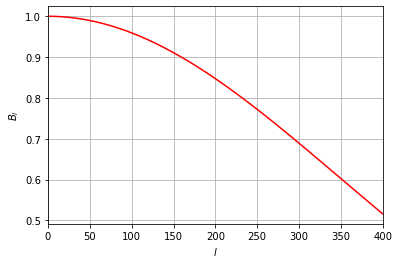

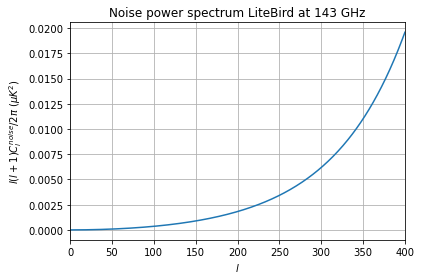

In [187]:
def Bl_litebird_143(l) :
    return np.exp(-theta_litebird_143**2*l*(l+1)/2)
def Cl_litebird_143(l) :
    return fsky/(w_litebird_143*Bl_litebird_143(l)**2)
def Dl_litebird_143(l) :
    return l*(l+1)*Cl_litebird_143(l)/(2*np.pi)

plt.figure(1)
plt.plot(l, Bl_litebird_143(l), color='red')
plt.xlabel('$l$')
plt.ylabel('$B_l$')
plt.grid('on')
plt.xlim(0,400)

plt.figure(2)
plt.grid('on')
plt.xlim(0,400)
plt.plot(l, Dl_litebird_143(l))
plt.title('Noise power spectrum LiteBird at 143 GHz')
plt.xlabel('$l$')
plt.ylabel('$l(l+1)C_l^{noise}/2\pi$ $(\mu K^2)$')


0.3681598094701974


Text(0, 0.5, '$l(l+1)C_l^{noise}/2\\pi$ $(\\mu K^2)$')

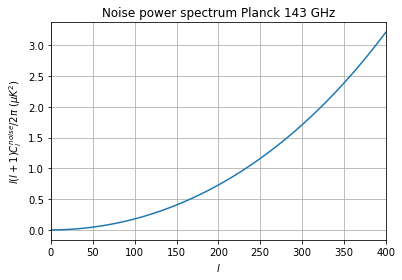

In [188]:

def Bl_planck_143(l) :
    return np.exp(-theta_planck_143**2*l*(l+1)/2)
def Cl_planck_143(l) :
    return fsky/(w_planck_143*Bl_planck_143(l)**2)
def Dl_planck_143(l) :
    return l*(l+1)*Cl_planck_143(l)/(2*np.pi)
print(Dl_planck_143(143))

plt.figure(1)
plt.grid('on')
plt.xlim(0,400)
plt.plot(l, Bl_planck_143(l), color='red')
plt.xlabel('$l$')
plt.ylabel('$B_l$')
plt.figure(2)
plt.grid('on')
plt.xlim(0,400)
plt.plot(l, Dl_planck_143(l))
plt.title('Noise power spectrum Planck 143 GHz')
plt.xlabel('$l$')
plt.ylabel('$l(l+1)C_l^{noise}/2\pi$ $(\mu K^2)$')

    


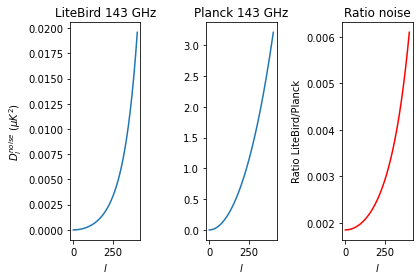

In [189]:
def r(l):
    return Dl_litebird_143(l)/Dl_planck_143(l)

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(l, Dl_litebird_143(l))
ax1.set_title('LiteBird 143 GHz')
ax1.set(xlabel='$l$', ylabel='$D_l^{noise}$ $(\mu K^2)$')
ax2.plot(l, Dl_planck_143(l))
ax2.set_title('Planck 143 GHz')
ax2.set(xlabel='$l$')
ax3.plot(l,r(l), color='red')
ax3.set_title('Ratio noise')
ax3.set(xlabel='$l$', ylabel='Ratio LiteBird/Planck')
fig.tight_layout()
plt.show()

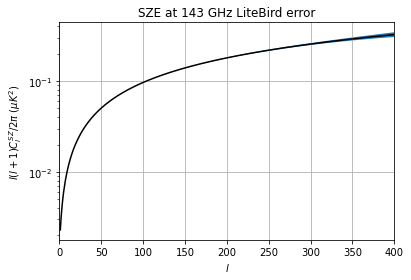

In [190]:
plt.plot(l, D, 'k-')
plt.xlim(0,400)
plt.fill_between(l, D-Dl_litebird_143(l), D+Dl_litebird_143(l))
plt.xlabel('$l$')
plt.grid('on')
plt.ylabel('$l(l+1)C_l^{SZ}/2\pi$ $(\mu K^2)$')
plt.title('SZE at 143 GHz LiteBird error')
plt.yscale('log')

Text(0.5, 1.0, 'SZE at 143 GHz Planck error')

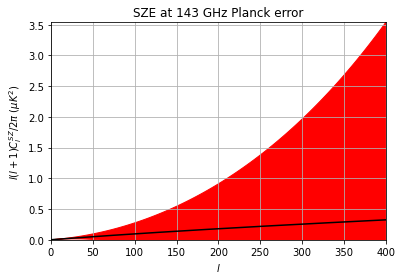

In [191]:
plt.plot(l, D, 'k-')
plt.xlim(0,400)
plt.fill_between(l, D-Dl_planck_143(l), D+Dl_planck_143(l), color='red')
plt.ylim(0,np.max(D+Dl_planck_143(l)))
plt.xlabel('$l$')
plt.grid('on')
plt.ylabel('$l(l+1)C_l^{SZ}/2\pi$ $(\mu K^2)$')
plt.title('SZE at 143 GHz Planck error')

# Noise power spectrum at 403 GHz
## Planck vs LiteBird

Text(0, 0.5, '$l(l+1)C_l^{noise}/2\\pi$ $(\\mu K^2)$')

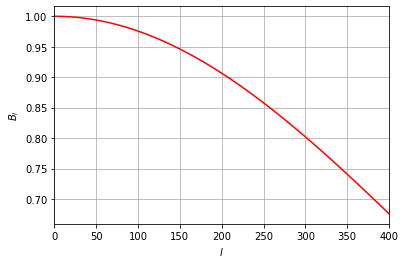

In [192]:
def Bl_litebird_403(l) :
    return np.exp(-theta_litebird_403**2*l*(l+1)/2)
def Cl_litebird_403(l) :
    return fsky/(w_litebird_403*Bl_litebird_403(l)**2)
def Dl_litebird_403(l) :
    return l*(l+1)*Cl_litebird_403(l)/(2*np.pi)


plt.figure(1)
plt.grid('on')
plt.plot(l, Bl_litebird_403(l), color='red')
plt.xlabel('$l$')
plt.ylabel('$B_l$')
plt.xlim(0,400)

plt.figure(2)
plt.grid('on')
plt.xlim(0,400)
plt.plot(l, Dl_litebird_403(l))
plt.title('Noise power spectrum LiteBird at 403 GHz')
plt.xlabel('$l$')
plt.ylabel('$l(l+1)C_l^{noise}/2\pi$ $(\mu K^2)$')


Text(0, 0.5, '$l(l+1)C_l^{noise}/2\\pi$ $(\\mu K^2)$')

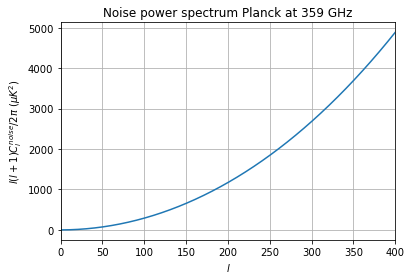

In [193]:


def Bl_planck_359(l) :
    return np.exp(-theta_planck_359**2*l*(l+1)/2)
def Cl_planck_359(l) :
    return fsky/(w_planck_359*Bl_planck_359(l)**2)
def Dl_planck_359(l) :
    return l*(l+1)*Cl_planck_359(l)/(2*np.pi)

plt.figure(1)
plt.grid('on')
plt.xlim(0,400)
plt.plot(l, Bl_planck_359(l), color='red')
plt.xlabel('$l$')
plt.ylabel('$B_l$')

plt.figure(2)
plt.grid('on')
plt.xlim(0,400)
plt.plot(l, Dl_planck_359(l))
plt.title('Noise power spectrum Planck at 359 GHz')
plt.xlabel('$l$')
plt.ylabel('$l(l+1)C_l^{noise}/2\pi$ $(\mu K^2)$')

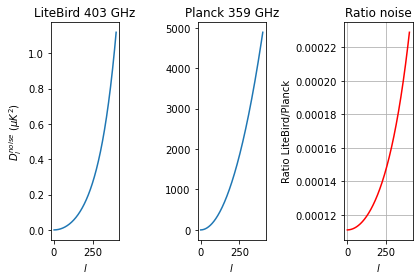

In [194]:
def r2(l):
    return Dl_litebird_403(l)/Dl_planck_359(l)

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(l, Dl_litebird_403(l))
ax1.set_title('LiteBird 403 GHz')
ax1.set(xlabel='$l$', ylabel='$D_l^{noise}$ $(\mu K^2)$')
ax2.plot(l, Dl_planck_359(l))
ax2.set_title('Planck 359 GHz')
ax2.set(xlabel='$l$')
ax3.plot(l,r2(l), color='red')
ax3.set_title('Ratio noise')
ax3.set(xlabel='$l$', ylabel='Ratio LiteBird/Planck')
plt.grid('on')
fig.tight_layout()
plt.show()

## Bining and introducing cosmic variance 143 GHz

14
14


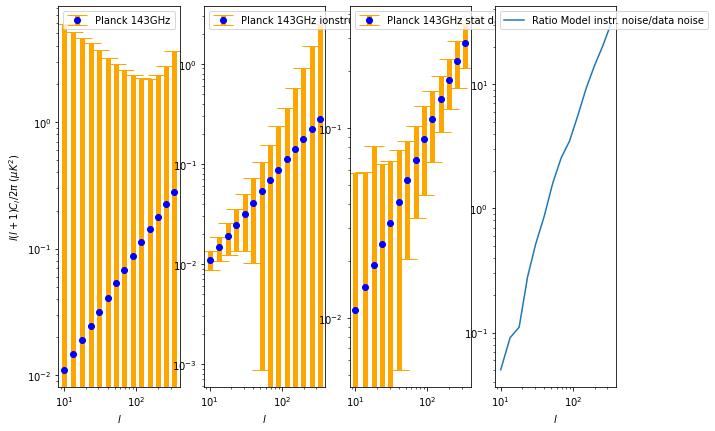

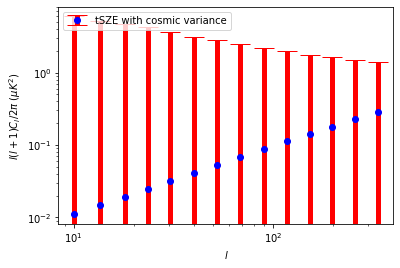

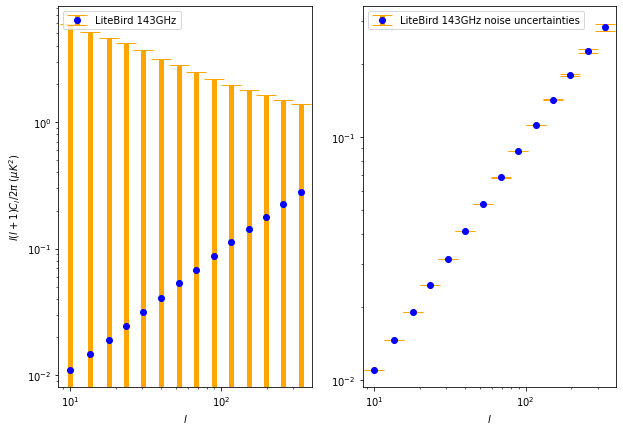

In [200]:
ellbin = np.array([9, 12, 16, 21, 27, 35, 46, 60, 78, 102, 133, 173,
224, 292, 380])
x, y, dx ,dy = bin_llcl(DD, ellbin)
sigma_tll = 10.3/np.sqrt(dx)
Dl_Planck_143=Dl_planck_143(l)
x1, y1, dx1, dy1 = bin_llcl(Dl_Planck_143, ellbin)
x2,y2,dx2,dy2 = bin_llcl(Dl_litebird_143(l), ellbin)

print(np.size(y))
print(np.size(sigma_stat_planck_143))

fig, (ax1, ax2, ax, axx) = plt.subplots(1,4,figsize=(10,7))
ax1.errorbar(x, y,yerr=sigma_tll+y1, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='Planck 143GHz')
ax1.set_title('')
ax1.legend(loc="upper left")
ax1.set(xlabel='$l$', ylabel='$l(l+1)C_l/2\pi$ $(\mu K^2)$')
ax2.errorbar(x, y,yerr=y1, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='Planck 143GHz ionstrumental noise model')
ax.errorbar(x, y,yerr=sigma_stat_planck_143, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='Planck 143GHz stat data noise')
axx.plot(x, y1/sigma_stat_planck_143, label='Ratio Model instr. noise/data noise')
axx.legend(loc="upper left")
axx.set(xlabel='$l$')
axx.set_xscale("log")
axx.set_yscale("log")
ax2.set_title('')
ax2.set(xlabel='$l$')
ax2.legend(loc="upper left")
ax.legend(loc="upper left")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax.set_xscale("log")
ax.set_yscale("log")


plt.figure(2)
plt.errorbar(x, y,yerr=sigma_tll, fmt = 'o',color = 'b', 
            ecolor = 'red', elinewidth = 5, capsize=10, label='tSZE with cosmic variance')
plt.legend(loc="upper left")
plt.xscale("log")
plt.yscale("log")
plt.ylabel('$l(l+1)C_l/2\pi$ $(\mu K^2)$')
plt.xlabel('$l$')


fig2, (ax3, ax4) = plt.subplots(1,2, figsize=(10,7))
ax3.errorbar(x, y,yerr=sigma_tll+y2, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='LiteBird 143GHz')
ax4.errorbar(x, y,yerr=y2, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='LiteBird 143GHz noise uncertainties')
ax3.set(xlabel='$l$', ylabel='$l(l+1)C_l/2\pi$ $(\mu K^2)$')
ax4.set(xlabel='$l$')
ax3.legend(loc="upper left")
ax4.legend(loc="upper left")
ax3.set_xscale("log")
ax3.set_yscale("log")
ax4.set_xscale("log")
ax4.set_yscale("log")

# Power spectrum @ 402

-1.0226968856685894 3.1611366882507745


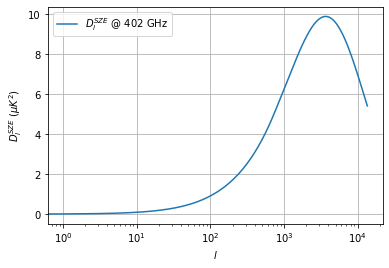

In [160]:



print(f_143, f_402)
DD_402 = f_402**2*DD/(f_143**2)

plt.plot(ll,DD_402, label='$D_l^{SZE}$ @ 402 GHz')
plt.legend(loc="upper left")
plt.grid('on')
plt.xlabel('$l$')
plt.ylabel('$D_l^{SZE}$ $(\mu K^2)$')
plt.xscale("log")


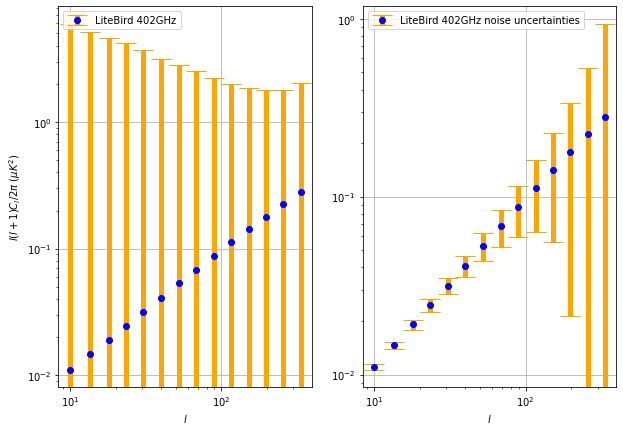

In [166]:
ellbin = np.array([9, 12, 16, 21, 27, 35, 46, 60, 78, 102, 133, 173,
224, 292, 380])
x3, y3, dx3 ,dy3 = bin_llcl(DD_402, ellbin)
sigma_tll = 10.3/np.sqrt(dx3)
Dl_Planck_359=Dl_planck_359(l)
x4, y4, dx4, dy4 = bin_llcl(Dl_Planck_359, ellbin)
x5,y5,dx5,dy5 = bin_llcl(Dl_litebird_403(l), ellbin)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,7))
ax1.errorbar(x3, y3,yerr=sigma_tll+y4, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='Planck 359GHz')
ax1.set_title('')
ax1.legend(loc="upper left")
ax1.set(xlabel='$l$', ylabel='$l(l+1)C_l/2\pi$ $(\mu K^2)$')
ax2.errorbar(x, y,yerr=y4, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='Planck 359GHz noise uncertainties')
ax2.set_title('')
ax2.set(xlabel='$l$')
ax2.legend(loc="upper left")

ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.grid()
ax2.grid()

plt.figure(2)
plt.errorbar(x, y3,yerr=sigma_tll, fmt = 'o',color = 'b', 
            ecolor = 'red', elinewidth = 5, capsize=10, label='tSZE with cosmic variance')
plt.legend(loc="upper left")
plt.xscale("log")
plt.yscale("log")
plt.ylabel('$l(l+1)C_l/2\pi$ $(\mu K^2)$')
plt.xlabel('$l$')
plt.grid()

fig2, (ax3, ax4) = plt.subplots(1,2, figsize=(10,7))
ax3.errorbar(x, y,yerr=sigma_tll+y5, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='LiteBird 402GHz')
ax4.errorbar(x, y,yerr=y5, fmt = 'o',color = 'b', 
            ecolor = 'orange', elinewidth = 5, capsize=10, label='LiteBird 402GHz noise uncertainties')
ax3.set(xlabel='$l$', ylabel='$l(l+1)C_l/2\pi$ $(\mu K^2)$')
ax4.set(xlabel='$l$')
ax3.legend(loc="upper left")
ax4.legend(loc="upper left")
ax3.set_xscale("log")
ax3.grid()
ax4.grid()
ax3.set_yscale("log")
ax4.set_xscale("log")
ax4.set_yscale("log")